In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time

In [2]:
def spectral_clustering(G, k):
    def plot_clusters(labels):
        nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=labels, with_labels=True, font_color='white')
        plt.show()
    old = time.time()
    A = np.array(nx.adjacency_matrix(G).todense()) #adjacency matrix
    D = np.diag([sum(row) for row in A])    #degree matrix
    L = D - A     #unnormalized laplacian
    evals, evecs = np.linalg.eig(L)  #eigen values and eigen vectors of laplacian
    evals = evals.real
    evecs = evecs.real
    eig_combine = [(evals[i], evecs[:, i]) for i in range(len(evals))]
    eig_combine = sorted(eig_combine, key=lambda x:x[0])
    idx = 0
    for e_com in eig_combine:
        if e_com[0] == 0:
            idx += 1
    X = []
    for _ in range(k):
        X.append(eig_combine[idx][1])
        idx += 1
    X = np.array(X).transpose()
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    labels = kmeans.labels_
    new = time.time()
    print("time taken:", (new - old))
    clusters = [[] for _ in range(k)]
    nodes = list(G.nodes())
    for i in range(len(labels)):
        clusters[labels[i]].append(nodes[i])
    modularity = nx.algorithms.community.quality.modularity(G, clusters)
    print("modularity score:", modularity)
    plot_clusters(labels)
    return clusters
    

time taken: 0.035935401916503906
modularity score: 0.3694474110992444


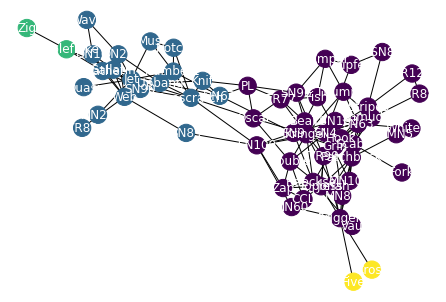

['Beak', 'Bumper', 'CCL', 'Double', 'Fish', 'Fork', 'Grin', 'Haecksel', 'Hook', 'Jonah', 'Kringel', 'MN105', 'MN60', 'MN83', 'Oscar', 'Patchback', 'PL', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN9', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Vau', 'Whitetip', 'Zap', 'Zipfel']
['Beescratch', 'DN16', 'DN21', 'DN63', 'Feather', 'Gallatin', 'Jet', 'Knit', 'MN23', 'Mus', 'Notch', 'Number1', 'Quasi', 'SN89', 'SN90', 'TR82', 'Upbang', 'Wave', 'Web']
['Ripplefluke', 'Zig']
['Cross', 'Five']


In [3]:
dolphins_graph = nx.read_gml("dolphins.gml")
k = 4
clusters = spectral_clustering(dolphins_graph, k)
for cluster in clusters:
    print(cluster)

time taken: 0.017938852310180664
modularity score: 0.233974358974359


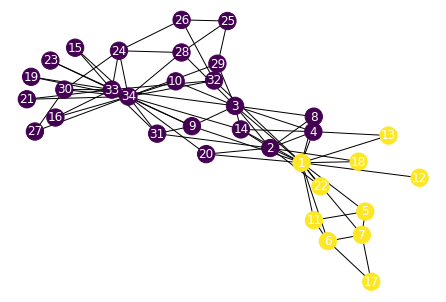

[2, 3, 4, 8, 9, 10, 14, 15, 16, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[1, 5, 6, 7, 11, 12, 13, 17, 18, 22]


In [4]:
karate_graph = nx.read_gml("karate.gml", label="id")
k = 2
clusters = spectral_clustering(karate_graph, k)
for cluster in clusters:
    print(cluster)

time taken: 0.031177282333374023
modularity score: 0.0021814005972416047


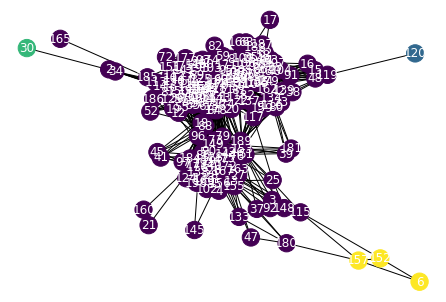

['1', '2', '3', '4', '5', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '153', '154', '155', '156', '158', '159', '160', '161', '162', '163'

In [5]:
jazz_graph = nx.read_gml("jazz.gml")
k = 4
clusters = spectral_clustering(jazz_graph, k)
for cluster in clusters:
    print(cluster)